Link: https://datascienceplus.com/linear-regression-in-python-predict-the-bay-areas-home-prices/

### In order to predict the Bay area’s home prices, I chose the housing price dataset that was sourced from Bay Area Home Sales Database and Zillow. This dataset was based on the homes sold between January 2013 and December 2015. It has many characteristics of learning,

### Importing Required Libraries

In [45]:
import pandas as pd
import numpy as np

data = pd.read_csv("C:\\Users\\SHASHI\\OneDrive\\Desktop\\Python\\Data.csv", sep = ",")

In [46]:
data.head(3)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0


### There are several features that we do not need, such as “info”, “z_address”, “zipcode”(We keep “neighborhood” as a location variable), “zipid” and “zestimate”(This is the price estimated by Zillow, we don’t want our model to be affected by this), so, we will drop them.

In [47]:
data.drop(data.columns[[0,2,3,15,17,18]], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11330 non-null  object 
 1   bathrooms      11330 non-null  float64
 2   bedrooms       11330 non-null  float64
 3   finishedsqft   11330 non-null  float64
 4   lastsolddate   11330 non-null  object 
 5   lastsoldprice  11330 non-null  float64
 6   latitude       11330 non-null  float64
 7   longitude      11330 non-null  float64
 8   neighborhood   11330 non-null  object 
 9   totalrooms     11330 non-null  float64
 10  usecode        11330 non-null  object 
 11  yearbuilt      11330 non-null  float64
 12  zindexvalue    11330 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


### The data type of “zindexvalue” should be numeric, so let’s change that.

In [48]:
data['zindexvalue'] = data['zindexvalue'].str.replace(',' , '')
data['zindexvalue'] = pd.to_numeric(data['zindexvalue'])

In [49]:
data.lastsolddate.min(), data.lastsolddate.max()

('01/02/2013', '12/31/2015')

### The house sold period in the dateset was between January 2013 and December 2015.

I now use the describe() method to show the summary statistics of the numeric variables.

In [50]:
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


## The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

To get a feel for the type of data we are dealing with, we plot a histogram for each numeric variable.

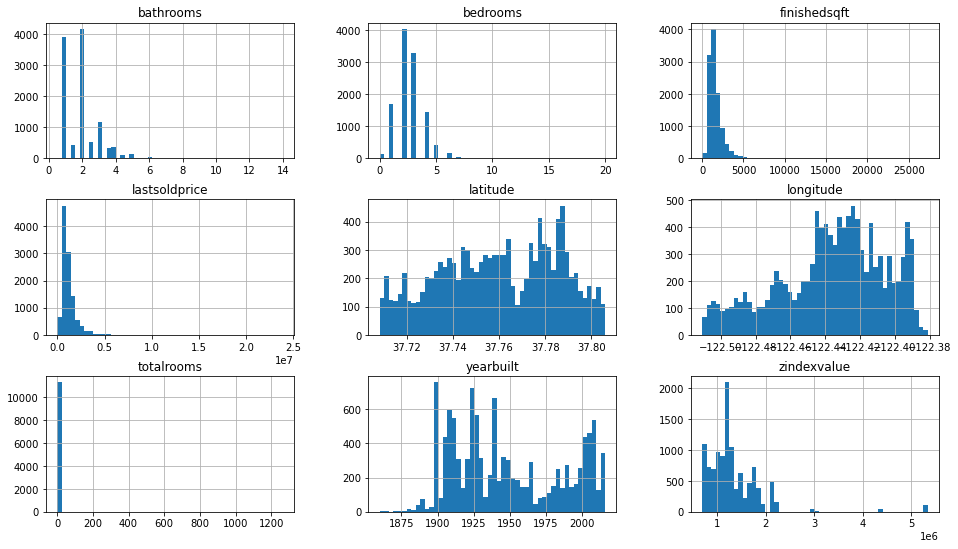

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(bins=50, figsize=(16,9))
plt.show()

## Some of the histograms are a little bit right skewed, but this is not abnormal.

Let’s create a scatter plot with latitude and longitude to visualize the data:

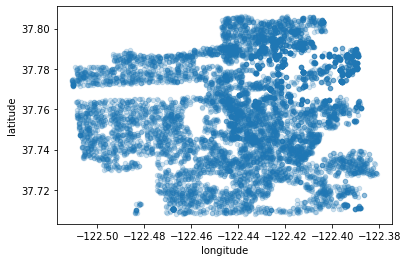

In [53]:
data.plot(kind = "scatter", x="longitude", y = "latitude", alpha = 0.20)
plt.show()

### Now let’s color code from the most expensive to the least expensive areas:

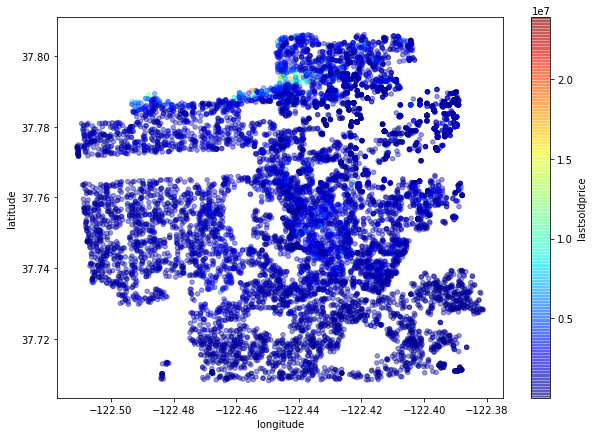

In [55]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.show()

### This image tells us that the most expensive houses sold were in the north area.

The variable we are going to predict is the “last sold price”. So let’s look at how much each independent variable correlates with this dependent variable.

In [63]:
corr_matrix = data.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

The last sold price tends to increase when the finished sqft and the number of bathrooms go up. You can see a small negative correlation between the year built and the last sold price. And finally, coefficients close to zero indicates that there is no linear correlation.

We are now going to visualize the correlation between variables by using Pandas’ scatter_matrix function. We will just focus on a few promising variables, that seem the most correlated with the last sold price.

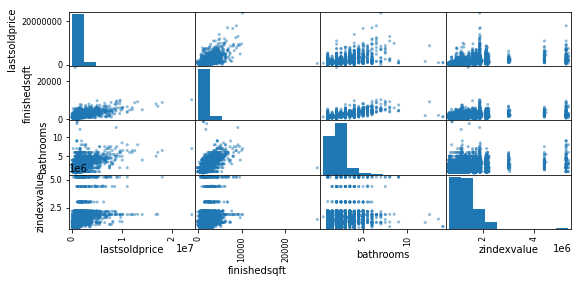

In [68]:
from pandas.plotting import scatter_matrix

attributes = ["lastsoldprice","finishedsqft","bathrooms","zindexvalue"]
scatter_matrix(data[attributes],figsize=(9,4))
plt.show()

The most promising variable for predicting the last sold price is the finished sqft, so let’s zoom in on their correlation scatter plot.

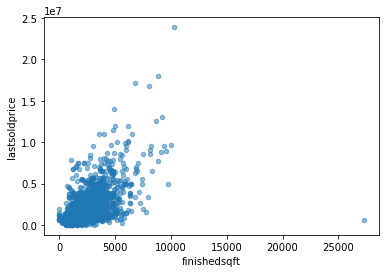

In [69]:
data.plot(kind = "scatter", x = "finishedsqft", y = "lastsoldprice", alpha = 0.50)
plt.show()

The correlation is indeed very strong; you can clearly see the upward trend and that the points are not too dispersed.

Because each house has different square footage and each neighborhood has different home prices, what we really need is the price per sqft. So, we add a new variable “price_per_sqft”. We then check to see how much this new independent variable correlates with the last sold price.

In [71]:
data['price_per_sqft'] = data['lastsoldprice']/data['finishedsqft']

corr_matrix = data.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.647208
bathrooms         0.536880
zindexvalue       0.460429
bedrooms          0.395478
latitude          0.283107
totalrooms        0.093527
price_per_sqft    0.005008
longitude        -0.052595
yearbuilt        -0.189055
Name: lastsoldprice, dtype: float64

Unfortunately, the new price_per_sqft variable shows only a very small positive correlation with the last sold price. But we still need this variable for grouping neighborhoods.

There are 71 neighborhoods in the data, and we are going to group them.

In [72]:
len(data['neighborhood'].value_counts())

71

The following steps cluster the neighborhood into three groups: 1. low price; 2. high price low frequency; 3. high price high frequency.

In [81]:
freq = data.groupby('neighborhood').count()['address']
mean = data.groupby('neighborhood').mean()['price_per_sqft']
cluster = pd.concat([freq,mean], axis = 1)
cluster['neighborhood'] = cluster.index
cluster.columns = ['freq','price_per_sqft','neighborhood']
cluster.describe()

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


In [82]:
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster.index

Index(['Bayview', 'Bernal Heights', 'Buena Vista Park', 'Central Richmond',
       'Central Sunset', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Cow Hollow', 'Crocker Amazon', 'Daly City', 'Diamond Heights',
       'Downtown', 'Eureka Valley - Dolores Heights - Castro', 'Excelsior',
       'Forest Hill', 'Forest Hill Extension', 'Glen Park',
       'Golden Gate Heights', 'Haight-Ashbury', 'Hayes Valley', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lake', 'Lakeshore', 'Lakeside',
       'Little Hollywood', 'Lone Mountain', 'Lower Pacific Heights', 'Marina',
       'Merced Heights', 'Midtown Terrace', 'Miraloma Park', 'Mission',
       'Mission Terrace', 'Mount Davidson Manor', 'Nob Hill', 'Noe Valley',
       'North Beach', 'North Panhandle', 'North Waterfront', 'Oceanview',
       'Outer Mission', 'Outer Parkside', 'Outer Richmond', 'Outer Sunset',
       'Pacific Heights', 'Parkside', 'Parnass

These are the high price and low frequency neighborhoods:

In [83]:
cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq < 123]
cluster.index

Index(['Bayview', 'Bernal Heights', 'Buena Vista Park', 'Central Richmond',
       'Central Sunset', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Cow Hollow', 'Crocker Amazon', 'Daly City', 'Diamond Heights',
       'Downtown', 'Eureka Valley - Dolores Heights - Castro', 'Excelsior',
       'Forest Hill', 'Forest Hill Extension', 'Glen Park',
       'Golden Gate Heights', 'Haight-Ashbury', 'Hayes Valley', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lake', 'Lakeshore', 'Lakeside',
       'Little Hollywood', 'Lone Mountain', 'Lower Pacific Heights', 'Marina',
       'Merced Heights', 'Midtown Terrace', 'Miraloma Park', 'Mission',
       'Mission Terrace', 'Mount Davidson Manor', 'Nob Hill', 'Noe Valley',
       'North Beach', 'North Panhandle', 'North Waterfront', 'Oceanview',
       'Outer Mission', 'Outer Parkside', 'Outer Richmond', 'Outer Sunset',
       'Pacific Heights', 'Parkside', 'Parnass

These are the high price and high frequency neighborhoods:

In [84]:
cluster3 = cluster_temp[cluster_temp.freq >= 123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

We add a group column based on the clusters:

In [85]:
def get_group(x):
    if x in cluster.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
data['group'] = data.neighborhood.apply(get_group)

After performing the above pre-processing, we do not need the following columns anymore: “address, lastsolddate, latitude, longitude, neighborhood, price_per_sqft”, so we drop them from our analysis.

In [86]:
data.drop(data.columns[[0,4,6,7,8,13]], axis = 1, inplace = True)
data = data[['bathrooms', 'bedrooms','finishedsqft','totalrooms','usecode','yearbuilt','zindexvalue','group','lastsoldprice']]
data.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,group,lastsoldprice
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700,low_price,1300000.0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700,low_price,750000.0
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600,low_price,1495000.0
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600,low_price,2700000.0
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000,low_price,1530000.0


But before we build the model, we need to create dummy variables for these two categorical variables: “usecode” and “group”.

In [87]:
X = data[['bathrooms','bedrooms','finishedsqft','totalrooms','usecode','yearbuilt','zindexvalue','group']]
Y = data['lastsoldprice']

n = pd.get_dummies(data.group)
X = pd.concat([X,n], axis=1)
m = pd.get_dummies(data.usecode)
X = pd.concat([X,m], axis=1)
drops = ['group','usecode']
X.drop(drops, inplace=True, axis=1)
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,low_price,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2.0,1043.0,4.0,2007.0,975700,1,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,2004.0,975700,1,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,2003.0,1277600,1,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,1927.0,1277600,1,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,4.0,1900.0,1248000,1,0,0,0,0,0,0,0,0,1,0


# Now Train and Build a Linear Regression Model

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Done! We now have a working Linear Regression model.

Calculate R squared:

In [101]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared:%.5f'%regressor.score(X_test,y_test))

Linear Regression R squared:0.53042


So, in our model, 53.042% of the variability in Y can be explained using X. This is not that exciting.

Calculate root-mean-square error (RMSE):

In [105]:
import numpy as np
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)

print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 637839.4101


Our model was able to predict the value of every house in the test set within $616071 of the real price.

Calculate mean absolute error (MAE):

In [106]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 379327.5991


# Random Forest
Let’s try a more complex model to see whether results can be improved — the RandomForestRegressor:

In [107]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [112]:
print('Random Forest R squared: %.4f' % forest_reg.score(X_test,y_test))

Random Forest R squared: 0.6706


In [117]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 534238.1901


Much better! Let’s try one more.

Gradient boosting

In [118]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [119]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.6502


In [120]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 550538.4025


These are the best results we got so far, so, I would consider this is our final model.

Feature Importance
We have used 19 features (variables) in our model. Let’s find out which features are important and vice versa.

In [122]:
feature_labels = np.array(['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt', 'zindexvalue', 
                           'high_price_high_freq', 'high_price_low_freq', 'low_price', 'Apartment', 'Condominium', 'Cooperative', 
                          'Duplex', 'Miscellaneous', 'Mobile', 'MultiFamily2To4', 'MultiFamily5Plus', 'SingleFamily', 
                           'Townhouse'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

MultiFamily5Plus-0.00%
Mobile-0.00%
Duplex-0.00%
Cooperative-0.00%
Apartment-0.00%
high_price_high_freq-0.00%
high_price_low_freq-0.00%
Miscellaneous-0.13%
low_price-0.18%
Condominium-0.18%
bedrooms-0.94%
yearbuilt-2.11%
totalrooms-2.66%
MultiFamily2To4-5.35%
bathrooms-13.17%
zindexvalue-21.75%
finishedsqft-53.52%


The most important features are finished sqft, zindex value, number of bathrooms, total rooms, year built and so on. And the least important feature is Apartment, which means that regardless of whether this unit is an apartment or not, does not matter to the sold price. Overall, most of these 19 features are used.